In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from torch import nn

import utils

In [2]:
model, labels_map, _ = utils.load_resnet50_modified("models/model.pt", verbose=False)

Loading model from models/model.pt ...
Model loaded!


In [3]:
def plot_weights(model, layer, single_channel = True, collated = False):
    # Checking whether the layer is convolution layer or not 
    if isinstance(layer, nn.Conv2d) or 1 == 1:
        # Getting the weight tensor data
        weight_tensor = layer.weight.data

        if single_channel:
            if collated:
                utils.plot_filters_single_channel_big(weight_tensor)
            else:
                utils.plot_filters_single_channel(weight_tensor)

        else:
            if weight_tensor.shape[1] == 3:
                utils.plot_filters_multi_channel(weight_tensor)
            else:
                print("Can only plot weights with three channels with single channel = False")
    else:
        print("Can only visualize layers which are convolutional")

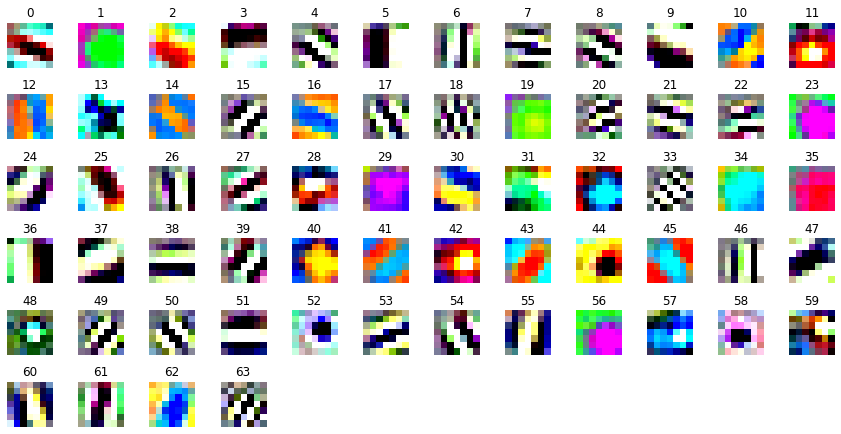

In [7]:
plot_weights(model, model.conv1, single_channel = False)